# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [264]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')
# import sklearn
# from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score
# from sklearn.preprocessing import LabelEncoder

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import StackingClassifier
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier

# import sklearn.linear_model as sk

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# #######################################################
# import warnings
# warnings.filterwarnings("ignore")

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc, roc_auc_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# from scipy.cluster.hierarchy import linkage,dendrogram


#Import the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [265]:
df = pd.read_csv('marketing.csv', encoding='unicode_escape')
#df.head()
# Display 5 records. Head also shows first few records.
df[:5]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [266]:
#Check the shape of the data...
#3 as per Lab session!!! Rest questions are n-1...

def basic_info(df):
    temp=df.copy(deep=True)
    print("Shape of the dataset is: ", df.shape)
    print("~"*80)
    print(df.info())

basic_info(df)


Shape of the dataset is:  (2240, 27)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts    

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [267]:
df.isnull().sum()/len(df)*100



ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [268]:
df.isnull().sum()
#df.isnull().sum().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [269]:
#df1 = df.fillna(value= 0)
# Can fill this with Zero.
# Refer to: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
#fill with mean value:
# df1 = df.fillna(value=df['Income'].mean())
# df1
# df1.isnull().sum()

# Since values with NULL were in-significant, thus dropped those rows instead of filling them...

# # Fill NaN values with Most occuring values...
temp_Income = df['Income'].value_counts().index[0]
df['Income'].fillna(value=temp_Income,inplace=True)
df.isnull().sum()

## If Drop rows:
#df = df.dropna()
#df.isnull().sum()

# df['Income']=df['Income'].fillna(df['Income'].mean())
# df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [270]:
len(df[df.duplicated()])
# As no duplicate record found, NOT droping any duplicates.
#df.drop_duplicates(inplace=True)
#df.shape

0

### 5. Drop the columns which you think redundant for the analysis 

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [272]:
#df.drop(['Dt_Customer', 'Teenhome'], axis=1,inplace=True)
df.drop(['ID','Dt_Customer'], axis=1,inplace=True)
print("~"*80)
basic_info(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Shape of the dataset is:  (2240, 25)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   in

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [273]:
#df["Marital_Status"].unique()
df["Marital_Status"].value_counts()


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [274]:
df["Marital_Status"] = df["Marital_Status"].replace(["Married", "Together"], "Relationship")
df["Marital_Status"] = df["Marital_Status"].replace(["Divorced", "Widow", "Alone", "YOLO", "Absurd"], "Single")
print(df["Marital_Status"].value_counts())

Marital_Status
Relationship    1444
Single           796
Name: count, dtype: int64


### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [275]:
df["Total_Expenses"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
print(df[:5])

   Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1957  Graduation         Single  58138.0        0         0       58   
1        1954  Graduation         Single  46344.0        1         1       38   
2        1965  Graduation   Relationship  71613.0        0         0       26   
3        1984  Graduation   Relationship  26646.0        1         0       26   
4        1981         PhD   Relationship  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  NumStorePurchases  \
0       635         88              546  ...                  4   
1        11          1                6  ...                  2   
2       426         49              127  ...                 10   
3        11          4               20  ...                  4   
4       173         43              118  ...                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7          

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [276]:
df["Num_Total_Purchases"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"] + df["NumDealsPurchases"]
df['Num_Total_Purchases'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: Num_Total_Purchases, dtype: float64

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [277]:
df["Kids"] = df["Kidhome"] + df["Teenhome"]
df['Kids'].describe()

count    2240.000000
mean        0.950446
std         0.751803
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Kids, dtype: float64

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [278]:
df["TotalAcceptedCmp"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"] + df["Response"]
df['TotalAcceptedCmp'].describe()


count    2240.000000
mean        0.446875
std         0.890543
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: TotalAcceptedCmp, dtype: float64

### 11. Drop those columns which we have used above for obtaining new features

In [279]:
df.drop(["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts","MntGoldProds"], axis = 1, inplace = True)
df.drop(["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumDealsPurchases"], axis = 1, inplace = True)
df.drop(["Kidhome", "Teenhome"], axis = 1, inplace = True)
df.drop(["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], axis = 1, inplace = True)

df.info()
df[:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Recency              2240 non-null   int64  
 5   NumWebVisitsMonth    2240 non-null   int64  
 6   Complain             2240 non-null   int64  
 7   Total_Expenses       2240 non-null   int64  
 8   Num_Total_Purchases  2240 non-null   int64  
 9   Kids                 2240 non-null   int64  
 10  TotalAcceptedCmp     2240 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 192.6+ KB


,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2,0
2,1965,Graduation,Relationship,71613.0,26,4,0,776,21,0,0
3,1984,Graduation,Relationship,26646.0,26,6,0,53,8,1,0
4,1981,PhD,Relationship,58293.0,94,5,0,422,19,1,0
5,1967,Master,Relationship,62513.0,16,6,0,716,22,1,0
6,1971,Graduation,Single,55635.0,34,6,0,590,21,1,0
7,1985,PhD,Relationship,33454.0,32,8,0,169,10,1,0
8,1974,PhD,Relationship,30351.0,19,9,0,46,6,1,1
9,1950,PhD,Relationship,5648.0,68,20,0,49,2,2,1


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [280]:
from datetime import datetime
current_year=datetime.now().year
df['age'] = current_year - df['Year_Birth']
df.info()
df[:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Recency              2240 non-null   int64  
 5   NumWebVisitsMonth    2240 non-null   int64  
 6   Complain             2240 non-null   int64  
 7   Total_Expenses       2240 non-null   int64  
 8   Num_Total_Purchases  2240 non-null   int64  
 9   Kids                 2240 non-null   int64  
 10  TotalAcceptedCmp     2240 non-null   int64  
 11  age                  2240 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 210.1+ KB


,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0,1,66
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2,0,69
2,1965,Graduation,Relationship,71613.0,26,4,0,776,21,0,0,58
3,1984,Graduation,Relationship,26646.0,26,6,0,53,8,1,0,39
4,1981,PhD,Relationship,58293.0,94,5,0,422,19,1,0,42
5,1967,Master,Relationship,62513.0,16,6,0,716,22,1,0,56
6,1971,Graduation,Single,55635.0,34,6,0,590,21,1,0,52
7,1985,PhD,Relationship,33454.0,32,8,0,169,10,1,0,38
8,1974,PhD,Relationship,30351.0,19,9,0,46,6,1,1,49
9,1950,PhD,Relationship,5648.0,68,20,0,49,2,2,1,73


In [281]:
df.drop(columns='Year_Birth',axis=1,inplace=True)

### 13. Encode the categorical variables in the dataset

In [282]:
cols=['Education', 'Marital_Status']
lble = LabelEncoder()
for i in cols:
    df[i]=df[[i]].apply(lble.fit_transform)

df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,2,1,58138.0,58,7,0,1617,25,0,1,66
1,2,1,46344.0,38,5,0,27,6,2,0,69
2,2,0,71613.0,26,4,0,776,21,0,0,58
3,2,0,26646.0,26,6,0,53,8,1,0,39
4,4,0,58293.0,94,5,0,422,19,1,0,42


### 14. Standardize the columns, so that values are in a particular range

In [283]:
df.head()




,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,2,1,58138.0,58,7,0,1617,25,0,1,66
1,2,1,46344.0,38,5,0,27,6,2,0,69
2,2,0,71613.0,26,4,0,776,21,0,0,58
3,2,0,26646.0,26,6,0,53,8,1,0,39
4,4,0,58293.0,94,5,0,422,19,1,0,42


In [284]:
df1 = df.copy()

scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
scaled_features_df.head(5)


,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,-0.350141,1.346874,0.250276,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,1.346874,-0.213095,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,-0.742460,0.779692,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,-0.350141,-0.742460,-0.987004,-0.798086,0.281720,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,1.428354,-0.742460,0.256366,1.550305,-0.130463,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   int32  
 1   Marital_Status       2240 non-null   int32  
 2   Income               2240 non-null   float64
 3   Recency              2240 non-null   int64  
 4   NumWebVisitsMonth    2240 non-null   int64  
 5   Complain             2240 non-null   int64  
 6   Total_Expenses       2240 non-null   int64  
 7   Num_Total_Purchases  2240 non-null   int64  
 8   Kids                 2240 non-null   int64  
 9   TotalAcceptedCmp     2240 non-null   int64  
 10  age                  2240 non-null   int64  
dtypes: float64(1), int32(2), int64(8)
memory usage: 175.1 KB


In [286]:
cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663,  0.01375403,  0.11835904, -0.01173369, -0.04029882,
        -0.05056252,  0.09209518,  0.09405439,  0.05321304,  0.06327892,
         0.17146685],
       [ 0.01375403,  1.00044663, -0.0069758 ,  0.00450972, -0.00344176,
         0.00520466,  0.01775232, -0.00671037, -0.03917598,  0.06004206,
         0.0042384 ],
       [ 0.11835904, -0.0069758 ,  1.00044663, -0.00969626, -0.53917303,
        -0.02495218,  0.6577104 ,  0.55857701, -0.29354812,  0.28571634,
         0.156235  ],
       [-0.01173369,  0.00450972, -0.00969626,  1.00044663, -0.02145427,
         0.01323699,  0.02044173,  0.00574294,  0.01806145, -0.08900203,
         0.01987996],
       [-0.04029882, -0.00344176, -0.53917303, -0.02145427,  1.00044663,
         0.01977734, -0.50044131, -0.31242795,  0.41860616, -0.12836726,
        -0.12119336],
       [-0.05056252,  0.00520466, -0.02495218,  0.01323699,  0.01977734,
         1.00044663, -0.03707503, -0.02059185,  0.03108014, -0.01761676,
         0.030

In [287]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eigein vals:', '\n', eig_vals)
print('\n')
print('eigein vectors','\n', eig_vectors)

eigein vals: 
 [3.18109316 0.15945603 0.34665733 1.25644713 0.57213042 0.70128271
 0.81478837 0.88249694 1.0750349  0.99859057 1.01693535]


eigein vectors 
 [[-8.09150474e-02 -1.32806946e-02  2.32640580e-02  5.53795301e-01
   9.49560794e-02 -1.08551858e-01 -6.91384532e-01 -2.11769090e-01
   3.50140899e-01  1.35055599e-01  3.93494704e-02]
 [-1.62507507e-02  3.59737062e-04 -4.92970003e-03 -7.23960215e-02
  -1.22249429e-02 -1.62155885e-01  9.76354200e-02  2.48818024e-01
   2.94899552e-01  5.08062346e-01 -7.42623821e-01]
 [-4.51563721e-01 -9.89923667e-02 -7.32425697e-01  1.07661655e-01
  -4.07092346e-01 -2.38760395e-01  3.33350342e-02  8.13115879e-02
  -6.75968831e-02 -3.97089953e-02  4.06526394e-02]
 [ 6.13104644e-03 -3.79591192e-02 -2.50430278e-02  1.09923062e-01
  -5.29169327e-02  1.35425766e-01 -2.74193302e-02 -4.74562083e-01
  -6.57621469e-01  5.46100730e-01 -8.95429968e-02]
 [ 3.77991840e-01  1.05866975e-01 -5.22104731e-01  3.96525207e-02
   4.47681018e-01 -8.69696321e-02  2.9376884

In [288]:
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance: ', var_exp)
print('Cummulative Variance Explained: ', cum_var_exp)

Explained Variance:  [28.90611843429595, 11.417147400751029, 9.768681596492804, 9.240739608854891, 9.074043377536123, 8.019117872320326, 7.40386024908951, 6.3724512627498635, 5.19886366942054, 3.150023380016583, 1.4489531484723701]
Cummulative Variance Explained:  [ 28.90611843  40.32326584  50.09194743  59.33268704  68.40673042
  76.42584829  83.82970854  90.2021598   95.40102347  98.55104685
 100.        ]


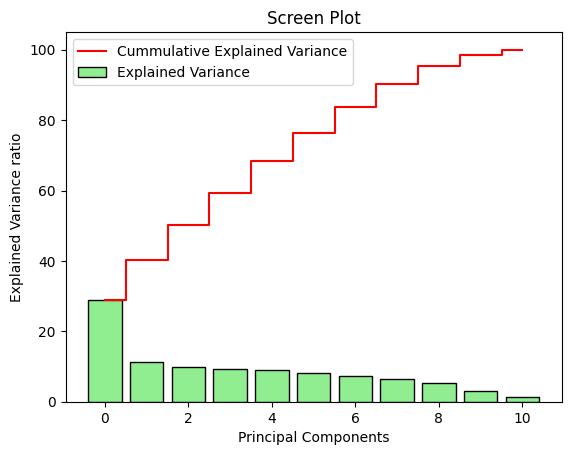

In [289]:
plt.bar(range(11),var_exp,align='center',color='lightgreen',edgecolor='black',label='Explained Variance')
plt.step(range(11), cum_var_exp, where='mid',color='red',label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance ratio')
plt.title('Screen Plot')
plt.legend(loc='best')
plt.show()




### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [290]:
pca = PCA(n_components=8)
pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.966594,-0.070294,-0.336034,1.204005,-0.689000,-0.293438,-1.150485,-0.340502
1,-1.507048,0.996381,-0.368806,1.011662,-0.420997,1.371837,-0.726433,-0.338496
2,1.318613,-0.297203,0.296976,-0.775898,0.724078,0.984784,0.021719,0.064259
3,-1.735736,-1.137093,-0.258745,-0.833181,0.573384,0.220414,0.563103,0.237277
4,0.067956,0.568410,0.903858,-0.749828,-0.809369,-1.232951,1.328090,0.904008


In [291]:
cluster_error = []
cluster_range = range(2,15)
for i in cluster_range:
    Clusters = KMeans(i,random_state=100)
    Clusters.fit(pca_df)
    cluster_error.append(Clusters.inertia_)

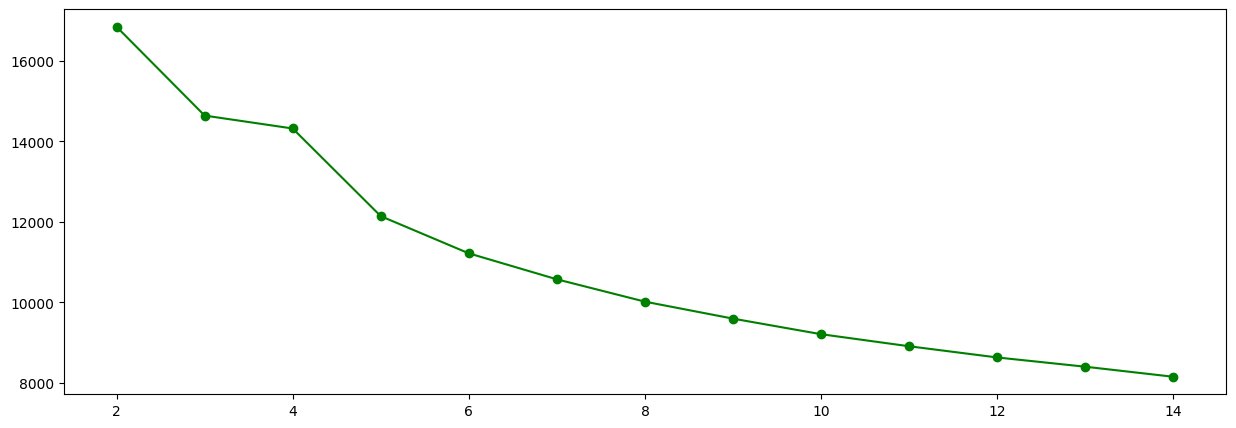

In [292]:
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_error':cluster_error})

# Display Elbow plot.
plt.figure(figsize=(15,5))
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_error'],marker='o',color='g')
plt.show()

In [293]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [294]:
label = pd.DataFrame(kmeans.labels_,columns=['Label'])
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Label   2240 non-null   int32
dtypes: int32(1)
memory usage: 8.9 KB


In [295]:
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,1.966594,-0.070294,-0.336034,1.204005,-0.689000,-0.293438,-1.150485,-0.340502,0
1,-1.507048,0.996381,-0.368806,1.011662,-0.420997,1.371837,-0.726433,-0.338496,1
2,1.318613,-0.297203,0.296976,-0.775898,0.724078,0.984784,0.021719,0.064259,0
3,-1.735736,-1.137093,-0.258745,-0.833181,0.573384,0.220414,0.563103,0.237277,1
4,0.067956,0.568410,0.903858,-0.749828,-0.809369,-1.232951,1.328090,0.904008,1


In [296]:
kmeans_df['Label'].value_counts()

Label
1    1262
0     957
2      21
Name: count, dtype: int64

<Axes: xlabel='PC1', ylabel='PC2'>

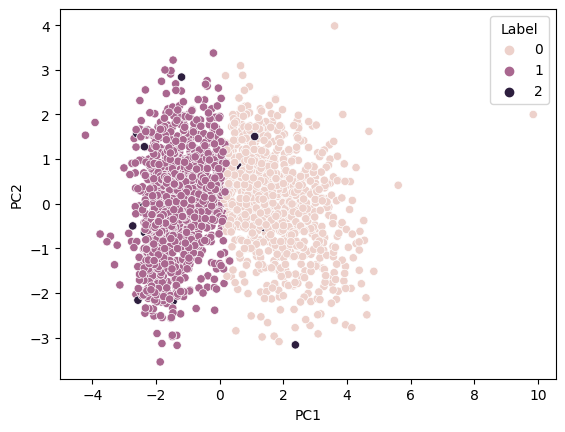

In [297]:
sns.scatterplot(x=kmeans_df['PC1'],y=kmeans_df['PC2'],hue='Label',data=kmeans_df)

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

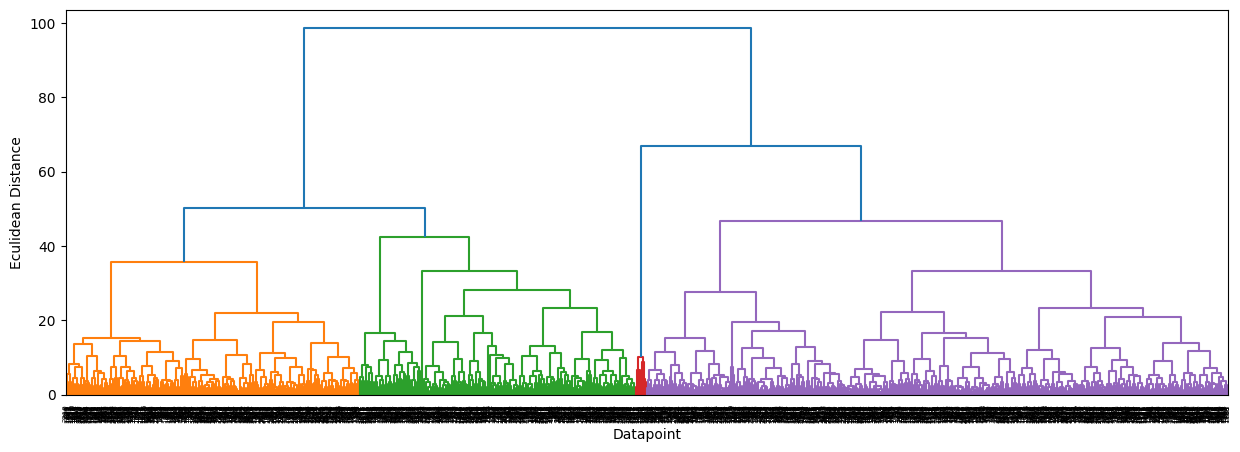

In [298]:
plt.figure(figsize=[15,5])
ward=linkage(scaled_features,method='ward')
dendrogram(ward, leaf_rotation=90,color_threshold=0.5*max(ward[:, 2]))
plt.xlabel('Datapoint')
plt.ylabel('Eculidean Distance')
plt.show()

In [299]:
#Calculate Silhouette score:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(f'silhouette_score {i}:{silhouette_score(scaled_features_df,labels)}')

silhouette_score 2:0.19681555161747163
silhouette_score 3:0.20612542736676254
silhouette_score 4:0.13994531295887203
silhouette_score 5:0.12145507818494881
silhouette_score 6:0.12873036969385993
silhouette_score 7:0.12757144373030696
silhouette_score 8:0.10450425233957664
silhouette_score 9:0.10588899030256585
silhouette_score 10:0.10994200109854196
silhouette_score 11:0.1118033380675821
silhouette_score 12:0.11059689353738703
silhouette_score 13:0.10328076553258139
silhouette_score 14:0.09815462267596921


SilHouette score for value 3 appears to be highest for consideration.

In [300]:
#Build a Hierarchal model
hrch_cluster = AgglomerativeClustering(n_clusters=3,linkage='ward',affinity='euclidean')
hrchClt_model = hrch_cluster.fit(scaled_features_df)
hr_dfLabel=pd.DataFrame(hrchClt_model.labels_,columns=['label'])
hr_dfLabel.head()

,label
0,0
1,1
2,0
3,1
4,1


In [301]:
df_hier = df.join(hr_dfLabel)
df_hier.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age,label
0,2,1,58138.0,58,7,0,1617,25,0,1,66,0
1,2,1,46344.0,38,5,0,27,6,2,0,69,1
2,2,0,71613.0,26,4,0,776,21,0,0,58,0
3,2,0,26646.0,26,6,0,53,8,1,0,39,1
4,4,0,58293.0,94,5,0,422,19,1,0,42,1


### Visualization and Interpretation of results

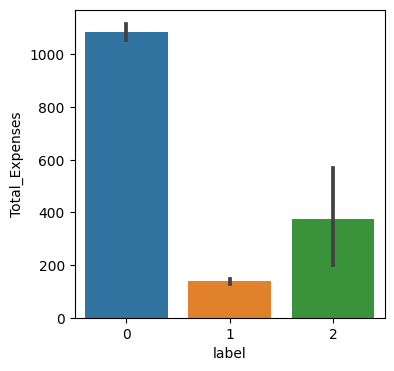

In [302]:
plt.figure(figsize=[4,4])
sns.barplot(x=df_hier['label'],y=df_hier['Total_Expenses'])
plt.show()

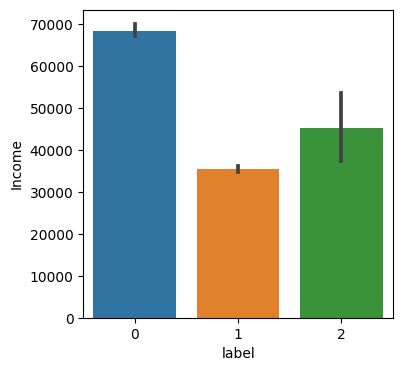

In [303]:
plt.figure(figsize=[4,4])
sns.barplot(x=df_hier['label'],y=df_hier['Income'])
plt.show()

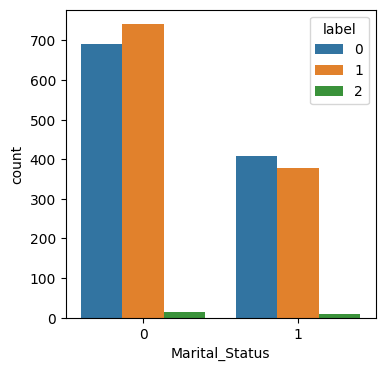

In [304]:
plt.figure(figsize=[4,4])
sns.countplot(x=df_hier['Marital_Status'],hue=df_hier['label'],data=df_hier)
plt.show()

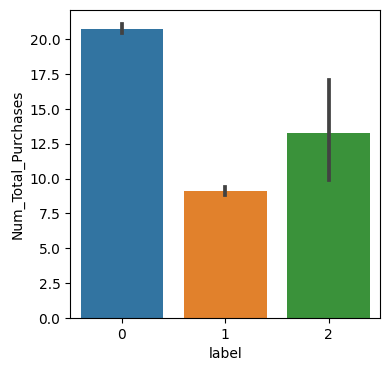

In [305]:
plt.figure(figsize=[4,4])
sns.barplot(x=df_hier['label'],y=df_hier['Num_Total_Purchases'])
plt.show()

-----
## Happy Learning
-----